In [1]:
"""
"""
import numpy as np
import seaborn as sns
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

In [2]:
# set the label fontsize
xy_label_fontsize = 16

# set the start and end times for our subselection of data
##start = snakemake.config["plt_t0"]
##end = snakemake.config["plt_tf"]

# force 'normal' text style for math text
mpl.rcParams['mathtext.default'] = 'regular'

In [3]:
def major_ticks(x, pos=None):
    """Set the major ticks according 
    to this custom style
    """
    x = mdates.num2date(x)
    if pos == 0:
        fmt = "%-d\n%b %Y\n%I %p"
    else:
        fmt = "%-d"
    return x.strftime(fmt)

In [4]:
# set global seaborn params
sns.set("paper", "ticks", color_codes=True, palette='colorblind')

In [5]:
# load the QuantAQ data
mit = pd.read_csv('final/MOD-00067.final2.csv')
mit['localtime'] = pd.to_datetime(mit['timestamp_local']) #convert timestamp column to pandas timestamp format
mit = mit.set_index('localtime',append=False) #setindex as local time

mit.head()

,timestamp_local,rh,temp,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,ox_diff,flag,pm1,pm25,pm10,co,no,no2,o3,co2
localtime,,,,,,,,,,,,,,,,,,,,,
2022-05-05 07:25:00,5/5/22 7:25,59.4,30.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.2,32,0.0,0.0,0.0,1788.013409,20.071223,4.832649,10.662362,337.876065
2022-05-05 07:26:00,5/5/22 7:26,59.4,30.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.2,32,0.0,0.0,0.0,1765.024939,34.810322,3.278596,6.491220,396.894329
2022-05-05 07:27:00,5/5/22 7:27,59.3,30.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.1,32,0.0,0.0,0.0,1727.026623,34.771724,3.700053,6.842013,420.260743
2022-05-05 07:28:00,5/5/22 7:28,58.7,30.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,32,0.0,0.0,0.0,1695.951513,40.675537,2.866601,7.399253,396.773883
2022-05-05 07:29:00,5/5/22 7:29,58.4,30.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,32,0.0,0.0,0.0,1668.357936,43.271007,3.000121,9.012739,390.751612


In [6]:
# resample the data to 15 min mean to make it easier to plot
start = '2022-06-07 4:00'
fin = '2022-06-11 12:00'
mit = mit[start:fin].resample('15min').mean()


/var/folders/d3/z1hh03l929gdlgfh23vm9h0c0000gp/T/ipykernel_28939/3849672406.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  mit = mit[start:fin].resample('15min').mean()


In [7]:
#PM2.5_corr = 2.83 + 0.65*purpleair + 0.0937*RH + 0.028*T
corr = 2.83 + 0.65*mit['pm25']+0.0937*mit['rh']+0.028*mit['temp']
corr
mit['corr'] = corr
mit

,rh,temp,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,...,flag,pm1,pm25,pm10,co,no,no2,o3,co2,corr
localtime,,,,,,,,,,,,,,,,,,,,,
2022-06-07 10:00:00,32.150000,40.650000,60.220200,5.071800,0.972150,0.213450,0.311000,0.227950,0.204650,0.053850,...,1.0,61.476147,65.415891,155.073780,446.705267,2.285987,11.090636,34.304970,452.299229,49.500984
2022-06-07 10:15:00,32.466667,40.400000,68.962447,6.103033,1.298633,0.228313,0.317407,0.207067,0.184633,0.077600,...,1.0,62.202682,65.885112,129.184996,427.682902,2.107307,9.619012,34.915571,454.242416,49.828650
2022-06-07 10:30:00,32.800000,40.166667,72.363667,6.901300,1.512633,0.256800,0.334167,0.211333,0.209367,0.060300,...,1.0,67.480204,71.425050,162.053183,445.037736,2.024825,9.052139,36.164471,452.138635,53.454309
2022-06-07 10:45:00,33.775000,39.400000,76.395500,7.080662,1.545800,0.334975,0.341925,0.231325,0.158250,0.080388,...,1.0,63.114291,66.904506,149.116167,472.680931,2.074538,7.816631,36.970378,449.152592,50.585846
2022-06-07 11:00:00,35.107143,38.607143,71.537736,6.568707,1.464207,0.281136,0.340050,0.228479,0.170357,0.080193,...,1.0,65.293023,69.084608,139.126249,513.007454,2.097844,7.542640,38.623436,443.609951,52.105534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-11 11:00:00,24.136364,39.100000,52.357255,4.651300,0.882236,0.149573,0.196900,0.143836,0.113373,0.048964,...,0.0,84.159069,86.605382,137.320155,490.169031,2.675461,16.264186,51.980331,438.119517,62.479876
2022-06-11 11:15:00,24.800000,38.570000,54.054820,4.949730,0.971580,0.163580,0.199040,0.157020,0.131190,0.052210,...,0.0,85.007473,87.681390,148.874491,542.823850,2.742898,18.744716,50.865531,435.954784,63.226623
2022-06-11 11:30:00,25.325000,38.125000,75.206525,7.177025,1.627025,0.295700,0.346700,0.232925,0.212625,0.087925,...,0.0,89.569579,93.837024,168.758466,592.504231,2.871688,20.513838,50.842264,434.292637,67.264518


Text(0, 0.5, '$PM_{2.5}$ [$\\mu g m^{-3}$]')

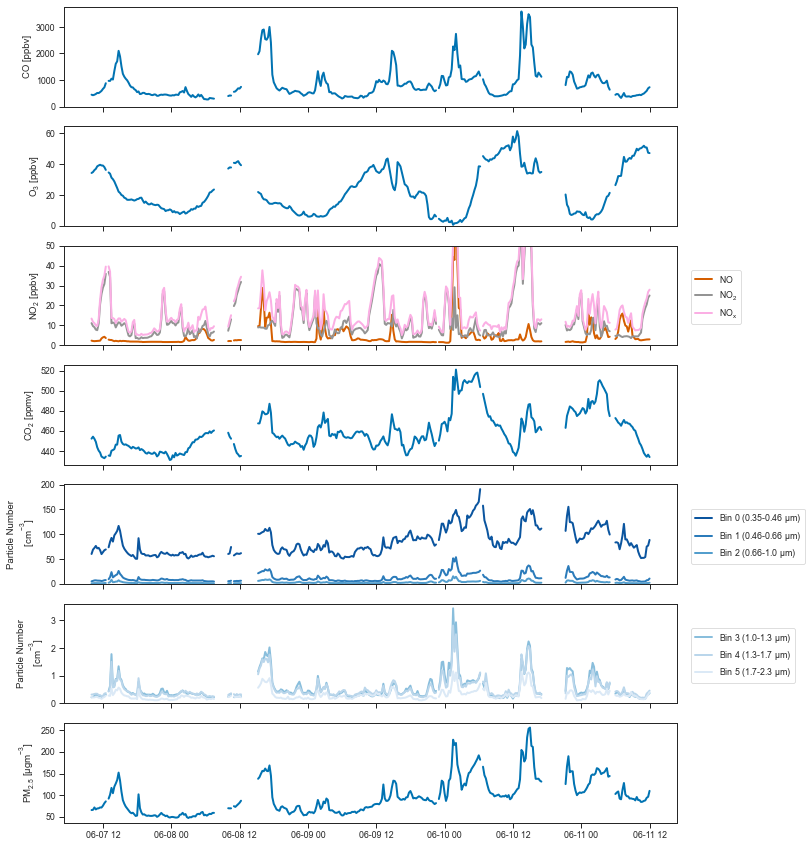

In [8]:
# set up the matplotlib figure
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(11, 15), sharex=True)

# grab the current color palette
cmap = sns.color_palette()

# plot the CO data and label the axis
ax[0].plot(mit['co'], lw=2, label="$CO$", color=sns.color_palette()[0])
ax[0].set_ylabel("CO [ppbv]")
ax[0].set_ylim(0, None)

# plot the o3 on the second axis
ax[1].plot(mit['o3'], lw=2, label="$O_3$", color=cmap[0])
ax[1].set_ylabel("$O_3$ [ppbv]")
ax[1].set_ylim(0, None)


#plot nox on the 3rd axis
ax[2].plot(mit['no'], lw=2, label="$NO$", color=cmap[3])
ax[2].plot(mit['no2'], lw=2, label="$NO_2$", color=cmap[7])
ax[2].plot(mit['no2']+mit['no'], lw=2, label="$NO_x$", color=cmap[6])
ax[2].set_ylabel("$NO_2$ [ppbv]")
ax[2].legend(bbox_to_anchor=(1.015, .8))
ax[2].set_ylim(0, 50)


#plot co2 on the 4th row
ax[3].plot(mit['co2'], lw=2, label="$CO_2$", color=sns.color_palette()[0])
ax[3].set_ylabel("$CO_2$ [ppmv]")


# plot the OPC bins on the 5th row
ax[4].plot(mit['bin0'], lw=2, label='Bin 0 (0.35-0.46 $\mu m$)', color=sns.color_palette("Blues_r", 6)[0])
ax[4].plot(mit['bin1'], lw=2, label='Bin 1 (0.46-0.66 $\mu m$)', color=sns.color_palette("Blues_r", 6)[1])
ax[4].plot(mit['bin2'], lw=2, label='Bin 2 (0.66-1.0 $\mu m$)', color=sns.color_palette("Blues_r", 6)[2])
ax[4].set(
    ylim=(0, None))
ax[4].set_ylabel("Particle Number\n $[cm^{-3}]$")
ax[4].legend(bbox_to_anchor=(1.015, .8))


ax[5].plot(mit['bin3'], lw=2, label='Bin 3 (1.0-1.3 $\mu m$)', color=sns.color_palette("Blues_r", 6)[3])
ax[5].plot(mit['bin4'], lw=2, label='Bin 4 (1.3-1.7 $\mu m$)', color=sns.color_palette("Blues_r", 6)[4])
ax[5].plot(mit['bin5'], lw=2, label='Bin 5 (1.7-2.3 $\mu m$)', color=sns.color_palette("Blues_r", 6)[5])
ax[5].set(
    ylim=(0, None))
ax[5].set_ylabel("Particle Number\n $[cm^{-3}]$")
ax[5].legend(bbox_to_anchor=(1.015, .8))



#plot pm25 on the 7th row
ax[6].plot(mit['pm25'], lw=2, label="$PM_{2.5}$", color=sns.color_palette()[0])
ax[6].set_ylabel("$PM_{2.5}$ [$\mu g m^{-3}$]")

In [9]:

# label the panels
pct = 0.9
#ax[0].text("2018-1-11 01:00", pct*ax[0].get_ylim()[-1], "(a)")
#ax[1].text("2018-1-11 01:00", pct*ax[1].get_ylim()[-1], "(b)")
#ax[2].text("2018-1-11 01:00", pct*ax[2].get_ylim()[-1], "(c)")


# set titles for each panel
ax[0].set_title("(a) CO", fontsize=14)
ax[1].set_title("(b) $O_3$", fontsize=14)
ax[2].set_title("(c) $NO_x$", fontsize=14)
ax[3].set_title("(d) $CO_2$", fontsize=14)
ax[4].set_title("(e) OPC Particle Counts", fontsize=14)
ax[5].set_title("(f) OPC Particle Counts", fontsize=14)
ax[6].set_title("(g) $PM_{2.5}$", fontsize=14)


# remove the tiop and right spine
sns.despine()

# force a tight layout
plt.tight_layout()

# save the figure
fig.savefig('timeseries_conc_part_sensors_daily_shorter.png', dpi=350, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, '$PM_{2.5}$ [$\\mu g m^{-3}$]')

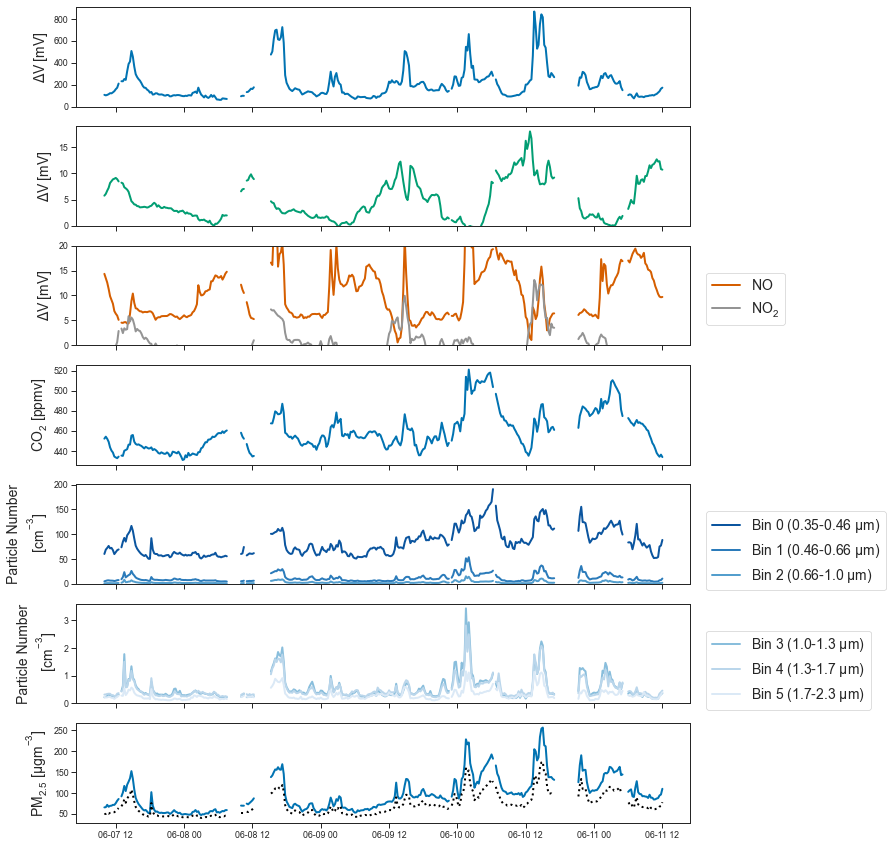

In [10]:
#second version of figure

# set up the matplotlib figure
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(11, 15), sharex=True)

# grab the current color palette
cmap = sns.color_palette()

# plot the CO data and label the axis
ax[0].plot(mit['co_diff'], lw=2, label="$CO$", color=sns.color_palette()[0])
ax[0].set_ylabel("$\Delta V\;[mV]$",fontsize=14)
ax[0].set_ylim(0, None)

# plot the o3 on the second axis
ax[1].plot(mit['ox_diff'], lw=2, label="$O_3$", color=cmap[2])
ax[1].set_ylabel("$\Delta V\;[mV]$",fontsize=14)
ax[1].set_ylim(0, None)


#plot nox on the 3rd axis
ax[2].plot(mit['no_diff'], lw=2, label="$NO$", color=cmap[3])
ax[2].plot(mit['no2_diff'], lw=2, label="$NO_2$", color=cmap[7])
ax[2].set_ylabel("$\Delta V\;[mV]$",fontsize=14)
ax[2].legend(bbox_to_anchor=(1.015, .8),fontsize=14)
ax[2].set_ylim(0, 20)


#plot co2 on the 4th row
ax[3].plot(mit['co2'], lw=2, label="$CO_2$", color=sns.color_palette()[0])
ax[3].set_ylabel("$CO_2$ [ppmv]",fontsize=14)


# plot the OPC bins on the 5th row
ax[4].plot(mit['bin0'], lw=2, label='Bin 0 (0.35-0.46 $\mu m$)', color=sns.color_palette("Blues_r", 6)[0])
ax[4].plot(mit['bin1'], lw=2, label='Bin 1 (0.46-0.66 $\mu m$)', color=sns.color_palette("Blues_r", 6)[1])
ax[4].plot(mit['bin2'], lw=2, label='Bin 2 (0.66-1.0 $\mu m$)', color=sns.color_palette("Blues_r", 6)[2])
ax[4].set(
    ylim=(0, None))
ax[4].set_ylabel("Particle Number\n $[cm^{-3}]$",fontsize=14)
ax[4].legend(bbox_to_anchor=(1.015, .8),fontsize=14)


ax[5].plot(mit['bin3'], lw=2, label='Bin 3 (1.0-1.3 $\mu m$)', color=sns.color_palette("Blues_r", 6)[3])
ax[5].plot(mit['bin4'], lw=2, label='Bin 4 (1.3-1.7 $\mu m$)', color=sns.color_palette("Blues_r", 6)[4])
ax[5].plot(mit['bin5'], lw=2, label='Bin 5 (1.7-2.3 $\mu m$)', color=sns.color_palette("Blues_r", 6)[5])
ax[5].set(
    ylim=(0, None))
ax[5].set_ylabel("Particle Number\n $[cm^{-3}]$",fontsize=14)
ax[5].legend(bbox_to_anchor=(1.015, .8),fontsize=14)


#plot pm25 on the 7th row
ax[6].plot(mit['pm25'], lw=2, label="$PM_{2.5}$ as-reported", color=sns.color_palette()[0])
ax[6].plot(mit['corr'], lw=2, label="$PM_{2.5}$ corrected", color='black',linestyle='dotted')

ax[6].set_ylabel("$PM_{2.5}$ [$\mu g m^{-3}$]",fontsize=14)

In [11]:
np.mean(mit['pm25'])


96.59597329938656

In [12]:
np.mean(mit['corr'])


71.52389551887545

In [13]:

# label the panels
pct = 0.9
#ax[0].text("2018-1-11 01:00", pct*ax[0].get_ylim()[-1], "(a)")
#ax[1].text("2018-1-11 01:00", pct*ax[1].get_ylim()[-1], "(b)")
#ax[2].text("2018-1-11 01:00", pct*ax[2].get_ylim()[-1], "(c)")


# set titles for each panel
ax[0].set_title("(a) CO", fontsize=14)
ax[1].set_title("(b) $O_3$", fontsize=14)
ax[2].set_title("(c) $NO_x$", fontsize=14)
ax[3].set_title("(d) $CO_2$", fontsize=14)
ax[4].set_title("(e) OPC Particle Counts", fontsize=14)
ax[5].set_title("(f) OPC Particle Counts", fontsize=14)
ax[6].set_title("(g) $PM_{2.5}$", fontsize=14)

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)
ax[3].tick_params(axis='both', which='major', labelsize=14)
ax[4].tick_params(axis='both', which='major', labelsize=14)
ax[5].tick_params(axis='both', which='major', labelsize=14)
ax[6].tick_params(axis='both', which='major', labelsize=14)
ax[6].locator_params(axis='y', nbins=4)
ax[5].locator_params(axis='y', nbins=4)
ax[4].locator_params(axis='y', nbins=4)
ax[3].locator_params(axis='y', nbins=4)
ax[2].locator_params(axis='y', nbins=4)
ax[1].locator_params(axis='y', nbins=4)
ax[0].locator_params(axis='y', nbins=4)



# remove the tiop and right spine
sns.despine()

# force a tight layout
plt.tight_layout()

# save the figure
fig.savefig('timeseries_conc_part_voltages_daily_shorter.png', dpi=350, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [14]:
#next step here -- implement a correction factor